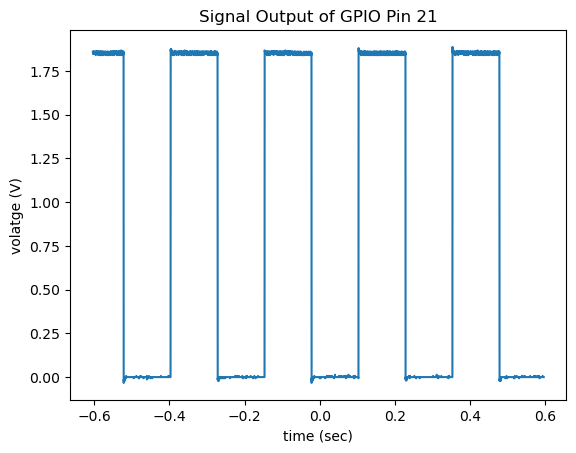

In [3]:
import pandas as pd
from scipy.signal import find_peaks
import numpy as np

df = pd.read_csv("timer-interrupt-log-high_res.csv")
df['smoothed_voltage'] = df['Volt'].rolling(window=3, min_periods=1, center=True).mean()
df.plot(x="Second",y="smoothed_voltage",legend=False , xlabel="time (sec)" ,ylabel="volatge (V)",title="Signal Output of GPIO Pin 21").get_figure().savefig("signal_output.png")
df = pd.read_csv("timer-interrupt-log-low_res.csv")
df['smoothed_voltage'] = df['Volt'].rolling(window=3, min_periods=1, center=True).mean()

<Axes: xlabel='time (sec)', ylabel='volatge (V)'>

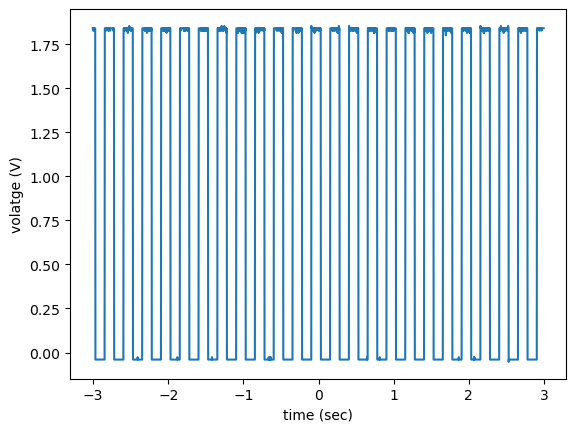

In [5]:
df.plot(x="Second",y="smoothed_voltage",legend=False , xlabel="time (sec)" ,ylabel="volatge (V)")

In [6]:

rising_edges, _ = find_peaks(df["Volt"],height=0.5 ,distance=240)
time_diff = np.diff(df["Second"][rising_edges])
period = time_diff/2
print(period)
print(np.mean(period))
print(np.std(period))

[0.08203    0.14766    0.103415   0.113085   0.18018    0.07148
 0.16377    0.127445   0.0788065  0.15293    0.141504   0.07851545
 0.18310555 0.1280275  0.07207    0.122754   0.171972   0.1251
 0.13066    0.077055   0.114255   0.18369    0.074125   0.142675  ]
0.12359625
0.03701111712575079
